In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression

#在python中,[,,,,,,]是list列表
studyH = [0.5,0.75,1.0,1.25,1.5,1.75,1.75,2.0,2.25,2.5,2.75,3.0,3.25,3.5,4.0,4.25,4.5,4.75,5.0,5.5]
passR = [0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1]

In [2]:
#因為使用scikit-learn
#X須為2維陣列,所以需要先將list轉換為ndarray,並將其維度設為2
#y須為1維陣列

#np.array(studyH)將studyH變為ndarray,reshape變更維度
X = np.array(studyH).reshape(-1,1)
y = np.array(passR).reshape(-1,)   

In [3]:
X.shape

(20, 1)

In [4]:
X

array([[0.5 ],
       [0.75],
       [1.  ],
       [1.25],
       [1.5 ],
       [1.75],
       [1.75],
       [2.  ],
       [2.25],
       [2.5 ],
       [2.75],
       [3.  ],
       [3.25],
       [3.5 ],
       [4.  ],
       [4.25],
       [4.5 ],
       [4.75],
       [5.  ],
       [5.5 ]])

In [6]:
y.shape

(20,)

In [6]:
y

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

In [11]:
#penalty=['l1','l2','elasticnet','none'],預設為l2(係數值變小),l1(係數為0)
#越大表示模型要越擬合訓練資料,意含overfit可能性會增加
model = LogisticRegression(penalty=None) 
model.fit(X,y)
model.score(X,y)

0.8

In [12]:
#C是Inverse of regularization strength(正則化強度的相反值)
#越大表示模型要越擬合訓練資料,意含overfit可能性會增加
#預設penalty='l2'
model_c10000 = LogisticRegression(C=10000.) 
model_c10000.fit(X,y)

LogisticRegression(C=10000.0)

In [13]:
#將model.predict(X)的結果與y進行比較,計算出accuracy
model_c10000.score(X,y) 

0.8

In [14]:
print(model_c10000.predict(X))
print(y)

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1]


In [15]:
print('coef', model_c10000.coef_)
print('intercept', model_c10000.intercept_)
print('max iteration',model_c10000.n_iter_)

coef [[1.50458575]]
intercept [-4.07756199]
max iteration [12]


# y = 1.5041644*X + -4.07629409

In [16]:
#model.predict(2)如果出現錯誤,應該是新版本的scikit-learn要求輸入的X必須是2維陣列
#model.predict([[2]])
#某個小朋友昨天複習2小時,請問是否會通過此次考試
model_c10000.predict(np.array([[2]]))

array([0])

In [20]:
model_c10000.predict_proba(np.array([2]).reshape(-1,1))

array([[0.74429071, 0.25570929]])

In [17]:
#依照model_10000所得到線性函數公式
print('y:{}'.format(1.5041644*2 + -4.07629409))

y:-1.06796529


In [18]:
def sigmoid_h(h):    
    p = -4.07629409+(1.5041644*h)    
    return 1.0 / (1.0 + np.exp(-p))

In [19]:
sigmoid_h(2)

0.2557902222910874

# (0.25579 < 0.5) => 0

In [21]:
model_c10000.predict(np.array([3]).reshape(-1,1))

array([1])

In [22]:
model_c10000.predict_proba(np.array([3]).reshape(-1,1))

array([[0.39264794, 0.60735206]])

In [23]:
sigmoid_h(3)

0.6073529830143976

# (0.607353 >= 0.5) => 1

In [24]:
h = np.arange(-10,10,0.1)
s_h = sigmoid_h(h)

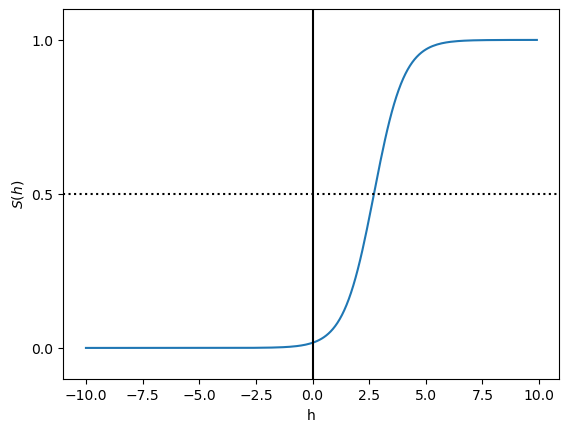

In [25]:
import matplotlib.pyplot as plt
plt.plot(h,s_h)
plt.axvline(0.0,color='k')
plt.axhspan(0.0,1.0, facecolor='1.0', alpha=1.0, ls='dotted')
plt.axhline(y=0.5, ls = 'dotted', color='k') 
plt.yticks([0.0, 0.5, 1.0]) 
plt.ylim(-0.1, 1.1) 
plt.xlabel('h')
plt.ylabel('$S(h)$')

plt.show()

In [26]:
model_c10 = LogisticRegression(C=10.)    #c越大,在訓練階段所得的model越擬合訓練資料
model_c10.fit(X,y)
print(model_c10.coef_,model_c10.intercept_)
for h in range(0,5):
    print(h,model_c10.predict(np.array(h).reshape(-1,1)))

[[1.44939867]] [-3.93299355]
0 [0]
1 [0]
2 [0]
3 [1]
4 [1]


In [27]:
model_c1 = LogisticRegression(C=1)
model_c1.fit(X,y)
print(model_c1.coef_,model_c1.intercept_)
for h in range(0,5):
    print(h,model_c1.predict(np.array(h).reshape(-1,1)))

[[1.14860386]] [-3.13952411]
0 [0]
1 [0]
2 [0]
3 [1]
4 [1]


In [28]:
model_cP1 = LogisticRegression(C=0.1)
model_cP1.fit(X,y)
print(model_cP1.coef_,model_cP1.intercept_)
for h in range(0,5):
    print(h,model_cP1.predict(np.array(h).reshape(-1,1)))

[[0.50732901]] [-1.40718947]
0 [0]
1 [0]
2 [0]
3 [1]
4 [1]


In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [30]:
#如果model.score(X_test,y_test)的accurancy非常差,請檢查X_train,X_test的組成內容,調整看看test_size,再看看結果
print(model.score(X_train,y_train),model.score(X_test,y_test))

0.8125 0.5


In [31]:
#降低C值,希望能夠避免overfit
model = LogisticRegression(C=0.1)
model.fit(X_train,y_train)
print(model.score(X_train,y_train),model.score(X_test,y_test))

0.8125 0.75


In [32]:
model = LogisticRegression(C=0.5)
model.fit(X_train,y_train)
print(model.score(X_train,y_train),model.score(X_test,y_test))

0.8125 0.5


In [33]:
model = LogisticRegression(C=0.25)
model.fit(X_train,y_train)
print(model.score(X_train,y_train),model.score(X_test,y_test))

0.8125 0.75


In [34]:
X_test

array([[4.75],
       [2.25],
       [3.  ],
       [3.25]])

In [35]:
y_test

array([1, 1, 0, 1])